In [1]:
import pandas as pd
import numpy as np

In [15]:
def get_DRA_concentrations(path_to_PI_data):
    # Read data
    df = pd.read_pickle(path_to_PI_data)
    df.index = df.index.tz_convert('MST').tz_localize(None)
    df = df.bfill()

    # Find DRA tags
    DRA_Q_tags = []
    DRA_MOV_tags = []
    other_DRA_related_tags = []
    pipeline_Q_tags = []
    for tag_name in df.columns:
        if 'DRA-Q' in tag_name:
            DRA_Q_tags.append(tag_name)
        elif 'DRA-MOV' in tag_name:
            DRA_MOV_tags.append(tag_name)
        elif 'DRA' in tag_name:
            other_DRA_related_tags.append(tag_name)
        elif (tag_name[-4:] == 'A0-Q') or (tag_name[-4:] == 'B0-Q'):
            pipeline_Q_tags.append(tag_name)
        
    if len(other_DRA_related_tags) != 0:
        raise(ValueError('Unexpected DRA tag name found:/n%s'%(other_DRA_related_tags)))
    for DRA_Q_tag in DRA_Q_tags:
        if DRA_Q_tag.replace('Q', 'MOV') not in DRA_MOV_tags:
            raise(ValueError('MOV tag associated with %s not found.'%(DRA_Q_tag)))
    for DRA_Q_tag in DRA_Q_tags:
        if DRA_Q_tag.replace('DRA-Q', 'Q') not in pipeline_Q_tags:
            raise(ValueError('Mainline flowrate tag associated with %s not found.'%(DRA_Q_tag)))
    
    # Get PPM
    df_result = df.loc[:,DRA_Q_tags]
    for DRA_Q_tag in DRA_Q_tags:
        DRA_MOV_tag = DRA_Q_tag.replace('Q', 'MOV')
        pipeline_Q_tag = DRA_Q_tag.replace('DRA-Q', 'Q')
        df_result[DRA_Q_tag.replace('Q', 'ppm')] = df.loc[:, DRA_Q_tag] / df.loc[:, pipeline_Q_tag] * 1000
        #df_result[DRA_Q_tag.replace('Q', 'ppm')] = df.loc[:, DRA_Q_tag] / df.loc[:, pipeline_Q_tag] * 1000
    
    # exclude inactive DRA sites

    return(df_result)


In [16]:
df_DRA = get_DRA_concentrations('../data/PI_data_for_linefill_all.pkl')

<Axes: xlabel='Timestamp'>

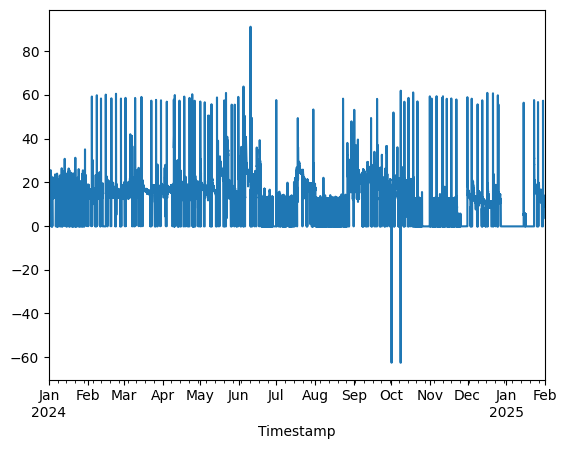

In [8]:
df_DRA['EDNBG-A0-DRA-Q'].plot()